In [1]:
from __future__ import print_function
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


import IPython.display as ipd
import seaborn as sns

import warnings
import os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
from xgboost.sklearn import XGBClassifier

/opt/anaconda/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
audio_features = pd.read_csv('/home/user/shaheen.perveen/SER_new/preprocess_info/audio_features.csv')

In [3]:
audio_features.head()

,wav_file,label,flatness,zerocr,meancent,stdcent,maxcent,pitchmean,pitchmax,pitchmin,...,mel126,mel127,mel128,contrast1,contrast2,contrast3,contrast4,contrast5,contrast6,contrast7
0,Ses01F_impro07_F000,2,0.000117,0.104217,0.003497,0.000913,0.007629,39.980061,177.585068,0.0,...,3.798325e-09,3.733791e-09,3.692167e-09,16.536948,16.284672,18.475872,17.406281,18.586443,19.425038,60.520979
1,Ses01F_impro07_F001,8,0.000100,0.075618,0.004464,0.001144,0.007696,21.843964,261.220825,0.0,...,7.410554e-09,7.287094e-09,7.207958e-09,17.575806,17.309719,20.956048,19.172998,18.847347,21.096493,57.565071
2,Ses01F_impro07_F002,2,0.000101,0.077476,0.001927,0.000580,0.005425,52.412819,177.578827,0.0,...,1.549797e-10,1.554628e-10,1.556276e-10,19.414308,15.665443,18.314568,16.283157,18.249842,20.907595,56.390271
3,Ses01F_impro07_F003,2,0.000127,0.096310,0.009709,0.002803,0.019800,94.230263,392.959503,0.0,...,1.685343e-09,1.672188e-09,1.663302e-09,15.788588,16.966773,20.352470,17.047441,18.516419,18.303163,59.933493
4,Ses01F_impro07_F004,2,0.000095,0.071841,0.004348,0.002400,0.015057,38.384247,123.568802,0.0,...,2.821108e-09,2.770337e-09,2.737887e-09,19.126089,17.503988,19.685403,17.224310,17.393296,17.973519,58.017080


In [4]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'exc': 2,
                'sad': 3,
                'fru': 4,
                'fea': 5,
                'sur': 6,
                'neu': 7,
                'xxx': 8,
                'oth': 8,
                'dis': 8}

In [3]:
audio_features.label.value_counts()

8    2634
4    1870
7    1791
0    1146
2    1140
3    1107
1     691
6     115
5      47
Name: label, dtype: int64

In [4]:
audio_4emotions = audio_features[audio_features["label"].isin([0, 1, 3, 7])]

In [5]:
audio_4emotions.shape

(4735, 201)

In [6]:
def emotion(x):
    if x == 0:
        return "angry"
    elif x == 1:
        return "happy"
    elif x == 3:
        return "sadness"
    else:
        return 'neutral'

In [7]:
audio_4emotions["emotion"] = audio_4emotions["label"].apply(emotion)

In [9]:
audio_4emotions["label"].value_counts()

7    1791
0    1146
3    1107
1     691
Name: label, dtype: int64

In [11]:
audio_4emotions.head()

,wav_file,label,flatness,zerocr,meancent,stdcent,maxcent,pitchmean,pitchmax,pitchmin,...,mel127,mel128,contrast1,contrast2,contrast3,contrast4,contrast5,contrast6,contrast7,emotion
29,Ses01F_impro07_M012,7,0.000264,0.086800,0.005208,0.002313,0.012480,52.247543,177.034454,0.0,...,5.105860e-10,5.038546e-10,19.750377,15.499886,18.575094,15.056193,17.538725,19.044305,59.164065,neutral
30,Ses01F_impro07_M013,7,0.000137,0.085653,0.007576,0.002925,0.017714,45.628986,304.920471,0.0,...,3.031110e-09,2.988381e-09,17.702971,16.291229,19.608798,16.181942,18.710160,19.209586,59.037311,neutral
35,Ses01F_impro07_M018,7,0.000157,0.074389,0.004854,0.001993,0.011810,21.954649,166.751450,0.0,...,6.656347e-09,6.560833e-09,19.837422,14.379512,19.636331,15.115151,17.851278,19.918788,57.848201,neutral
36,Ses01F_impro07_M019,1,0.000156,0.071291,0.001764,0.000529,0.003536,45.127403,209.938751,0.0,...,6.268069e-10,6.140121e-10,18.339358,14.827830,17.913266,15.262304,17.552523,18.375426,55.534309,happy
37,Ses01F_impro03_F000,1,0.000240,0.070553,0.008065,0.001883,0.014427,4.144345,131.188599,0.0,...,5.197816e-09,5.132288e-09,18.666856,16.702341,17.092052,15.970437,17.295833,20.087279,56.297245,happy


In [12]:
audio_4emotions.describe(include="all")

,wav_file,label,flatness,zerocr,meancent,stdcent,maxcent,pitchmean,pitchmax,pitchmin,...,mel127,mel128,contrast1,contrast2,contrast3,contrast4,contrast5,contrast6,contrast7,emotion
count,4735,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.0,...,4.735000e+03,4.735000e+03,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735
unique,4490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,Ses01F_impro03_M006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1791
mean,NaN,3.495037,0.000312,0.070607,0.007526,0.002474,0.016718,43.243368,183.476316,0.0,...,2.991690e-08,2.952686e-08,16.144358,15.136534,17.194661,15.954821,17.544264,18.991208,57.706912,NaN
std,NaN,2.927574,0.000184,0.020745,0.004461,0.001598,0.008823,24.770323,77.084247,0.0,...,1.047100e-06,1.032546e-06,2.007807,2.005920,2.155664,1.453652,1.022310,1.793391,2.126066,NaN
min,NaN,0.000000,0.000034,0.026913,0.000727,0.000244,0.002194,0.000000,0.000000,0.0,...,9.785191e-15,8.388579e-15,11.454611,10.457414,12.534730,12.859627,14.823969,15.545480,44.542727,NaN
25%,NaN,1.000000,0.000187,0.055339,0.004098,0.001337,0.010170,24.345686,123.737988,0.0,...,7.686208e-12,7.592438e-12,14.663789,13.541930,15.459968,14.815960,16.825392,17.564624,56.389897,NaN
50%,NaN,3.000000,0.000264,0.067143,0.006623,0.002091,0.015009,40.281933,177.343216,0.0,...,5.657292e-11,5.602064e-11,16.008165,15.031590,17.078562,15.690199,17.480183,18.691435,57.827051,NaN
75%,NaN,7.000000,0.000401,0.082363,0.010000,0.003152,0.021498,57.940716,230.263634,0.0,...,6.960107e-10,6.858047e-10,17.532509,16.627592,18.829188,16.853156,18.170303,20.155536,59.102611,NaN


In [10]:
train = audio_4emotions.iloc[:, 2:201]
target = audio_4emotions.iloc[:, 201]

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(train)
train_scaled = pd.DataFrame(scaled)
train_scaled.columns = train.columns
train_scaled.head()

,flatness,zerocr,meancent,stdcent,maxcent,pitchmean,pitchmax,pitchmin,pitchstd,pitch_tuning_offset,...,mel126,mel127,mel128,contrast1,contrast2,contrast3,contrast4,contrast5,contrast6,contrast7
0,0.122290,0.342139,0.146811,0.134667,0.158635,0.302040,0.438479,0.0,0.419174,0.000000,...,0.000007,0.000007,0.000007,0.734755,0.409187,0.535310,0.208050,0.413324,0.295239,0.697496
1,0.054771,0.335586,0.224373,0.174491,0.239353,0.263778,0.755227,0.0,0.569879,0.090909,...,0.000042,0.000042,0.000042,0.553417,0.473403,0.626919,0.314676,0.591676,0.309186,0.691449
2,0.065692,0.271237,0.135214,0.113795,0.148294,0.126919,0.413010,0.0,0.292184,0.717172,...,0.000093,0.000093,0.000093,0.742465,0.318271,0.629359,0.213634,0.460911,0.369030,0.634724
3,0.064940,0.253534,0.033955,0.018562,0.020694,0.260879,0.519976,0.0,0.447900,0.131313,...,0.000009,0.000009,0.000009,0.609781,0.354651,0.476657,0.227572,0.415425,0.238797,0.524342
4,0.109642,0.249318,0.240386,0.106676,0.188649,0.023958,0.324928,0.0,0.119808,1.000000,...,0.000073,0.000073,0.000073,0.638788,0.506764,0.403880,0.294643,0.376344,0.383248,0.560737


In [13]:
train_scaled.describe(include="all")

,flatness,zerocr,meancent,stdcent,maxcent,pitchmean,pitchmax,pitchmin,pitchstd,pitch_tuning_offset,...,mel126,mel127,mel128,contrast1,contrast2,contrast3,contrast4,contrast5,contrast6,contrast7
count,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.0,4735.000000,4735.000000,...,4.735000e+03,4.735000e+03,4.735000e+03,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000
mean,0.147896,0.249625,0.222746,0.145102,0.223988,0.249987,0.454434,0.0,0.379975,0.441072,...,4.179776e-04,4.186016e-04,4.189808e-04,0.415370,0.379702,0.412973,0.293164,0.414167,0.290759,0.627984
std,0.097490,0.118519,0.146164,0.103960,0.136073,0.143196,0.190922,0.0,0.169906,0.304401,...,1.465043e-02,1.465118e-02,1.465164e-02,0.177831,0.162777,0.191040,0.137684,0.155648,0.151330,0.101422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.081494,0.162400,0.110445,0.071140,0.123008,0.140741,0.306474,0.0,0.241244,0.191919,...,1.070554e-07,1.074097e-07,1.076163e-07,0.284237,0.250303,0.259241,0.185296,0.304719,0.170380,0.565157
50%,0.122285,0.229836,0.193143,0.120196,0.197631,0.232867,0.439244,0.0,0.377998,0.333333,...,7.899259e-07,7.914398e-07,7.948039e-07,0.403308,0.371186,0.402684,0.268100,0.404411,0.265463,0.633715
75%,0.194741,0.316793,0.303797,0.189241,0.297698,0.334952,0.570317,0.0,0.493703,0.757576,...,9.732766e-06,9.738549e-06,9.731327e-06,0.538319,0.500698,0.557828,0.378251,0.509483,0.389007,0.694565
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
X_train, X_test, y_train, y_test = train_test_split(train_scaled, target, stratify=target, test_size=0.2)

In [15]:
len(X_train)

3788

In [16]:
Counter(y_train)

Counter({'angry': 917, 'happy': 553, 'neutral': 1433, 'sadness': 885})

In [17]:
Counter(y_test)

Counter({'angry': 229, 'happy': 138, 'neutral': 358, 'sadness': 222})

In [28]:
labels=["sadness", "happy", "neutral", "angry"]

In [29]:
def plot_confusion_matrix(actual, predicted, labels):
    cm = confusion_matrix(actual, predicted, labels)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, annot_kws={"size": 10}, fmt='.0f'); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
    plt.show()

In [40]:
params = {'penalty':['l1', 'l2'], 'C':[2, 3, 5, 10]}

lr = LogisticRegression(class_weight='balanced')
clf = GridSearchCV(lr, param_grid = params, verbose=1, n_jobs = -1, cv=3)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done   2 out of  24 | elapsed:    1.5s remaining:   16.8s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   17.5s finished


Best score: 0.6069165786694826
Best parameters: {'C': 10, 'penalty': 'l1'}


In [41]:
log_best = clf.best_estimator_

In [42]:
y_pred = log_best.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      angry       0.71      0.79      0.75       229
      happy       0.46      0.41      0.44       138
    neutral       0.67      0.53      0.59       358
    sadness       0.61      0.77      0.68       222

avg / total       0.63      0.63      0.63       947



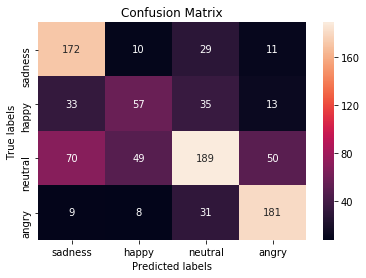

In [44]:
plot_confusion_matrix(y_test, y_pred, labels)

In [18]:
params = {'n_estimators': [200, 300, 500, 700], 'criterion': ['entropy', 'gini'], 'max_depth': [5, 10, 20, 30],
          'max_features': [4, 6, 8, 10]}

rf = RandomForestClassifier(class_weight="balanced")
clf = GridSearchCV(rf, param_grid=params, n_jobs=-1, verbose=1, cv=2)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Fitting 2 folds for each of 128 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:  2.0min finished


Best score: 0.6417634635691658
Best parameters: {'criterion': 'gini', 'max_depth': 30, 'max_features': 10, 'n_estimators': 700}


In [19]:
rf_best = clf.best_estimator_

In [20]:
y_pred = rf_best.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      angry       0.76      0.76      0.76       229
      happy       0.95      0.29      0.44       138
    neutral       0.60      0.76      0.67       358
    sadness       0.66      0.66      0.66       222

avg / total       0.70      0.67      0.66       947



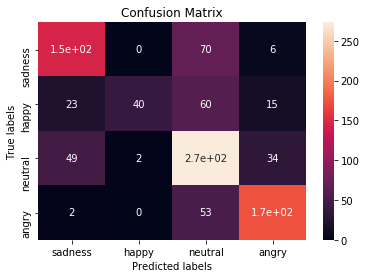

In [22]:
labels=["sadness", "happy", "neutral", "angry"]
cm = confusion_matrix(y_test, y_pred, labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["sadness", "happy", "neutral", "angry"]); ax.yaxis.set_ticklabels(["sadness", "happy", "neutral", "angry"]);
plt.show()

In [24]:
y0 = len([x for x in y_train if x == "neutral"])

y1 = len([x for x in y_train if x == "happy"])

y2 = len([x for x in y_train if x == "sadness"])

y3 = len([x for x in y_train if x == "angry"])



In [25]:
# w0 = (y0 / (y0 + y1 +y2 + y3))
# w1 = (y1 / (y0 + y1 +y2 + y3))
# w2 = (y2 / (y0 + y1 +y2 + y3))
# w3 = (y3 / (y0 + y1 +y2 + y3))

w0 = 1 / y0
w1 = 1 / y1
w2 = 1 / y2
w3 = 1 / y3

def weights(x):
    if x == "neutral":
        return w0
    if x == "happy":
        return w1
    if x == "sadness":
        return w2
    else:
        return w3


In [26]:
sample_weights = list(map(weights, y_train))

In [27]:
params = {'n_estimators': [200, 300, 400, 500], 'learning_rate': [0.05, 0.1, 0.5], 'loss': ["deviance"], 
          'max_features':[4, 6, 8, 10, 20]}

gbm = GradientBoostingClassifier(verbose=1)
clf = GridSearchCV(gbm, param_grid=params, n_jobs=-1, verbose=1, cv=2)
clf.fit(X_train, y_train, sample_weights)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Fitting 2 folds for each of 60 candidates, totalling 120 fits
      Iter       Train Loss   Remaining Time 
         1        2519.8518            3.35s
      Iter       Train Loss   Remaining Time 
         2        2467.9715            3.19s
         1        2523.3299            3.01s
      Iter       Train Loss   Remaining Time 
         3        2417.8489            2.96s
         2        2466.1713            3.33s
         1        2519.8518            4.04s
      Iter       Train Loss   Remaining Time 
         4        2373.5481            2.94s
         3        2416.3822            2.98s
         2        2467.9715            4.31s
         1        2523.3299            3.94s
      Iter       Train Loss   Remaining Time 
         5        2331.8813            2.97s
         4        2369.0778            2.72s
         3        2417.8489            3.96s
         2        2466.1713            3.81s
         1        2519.8518            5.23s
      Iter       Train Loss   Rem

         9        2188.3195            6.68s
         5        2313.3647            3.97s
         4        2362.8205            3.30s
        10        2158.9240            8.24s
        10        2151.8134            6.20s
      Iter       Train Loss   Remaining Time 
         3        2411.0290            6.73s
      Iter       Train Loss   Remaining Time 
         1        2515.0096            7.80s
        10        2158.4757            6.67s
        20        1944.7183            4.08s
         7        2253.0729           10.97s
         3        2404.7349            6.70s
         5        2315.4875            3.31s
         6        2281.5565            9.40s
        30        1818.1814            2.05s
         6        2275.7682            4.22s
         8        2211.3166            4.32s
         1        2521.0490            7.23s
         8        2219.2309           10.63s
         6        2275.0164            3.30s
      Iter       Train Loss   Remaining Time 
       

        80        1424.3504            1.53s
        80        1424.3504            3.86s
        30        1769.0198            9.20s
        80        1446.2031            4.03s
        60        1496.2270            3.73s
        50        1573.6784            2.65s
        70        1478.5257            5.73s
        40        1643.2015            5.29s
        90        1392.3801            1.35s
        40        1643.2015            8.41s
        50        1569.5060            2.70s
        60        1496.2270            5.38s
        60        1523.1782            5.47s
        90        1392.3801            2.58s
        60        1523.1782            4.03s
        80        1446.2031            5.35s
        60        1523.1782            6.95s
        40        1643.2015            7.28s
        70        1454.3749            1.86s
        50        1549.1498            2.69s
        90        1369.9981            1.40s
        40        1659.6145            9.26s
        80

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s


         4        2362.4154            5.56s
         6        2272.4719            6.64s
         5        2315.5719            6.09s
         7        2232.5463            6.82s
         6        2273.4509            6.79s
         8        2196.8829            7.59s
         7        2233.9413            6.90s
         8        2196.8332            7.42s
         9        2164.9283            7.91s
       200         924.5048            0.00s
        10        2133.7545            8.17s
         9        2163.8426            7.58s
       200         915.8173            1.48s
       200         924.5048            2.97s
        10        2131.6298            8.35s
       200         924.5048            1.51s
       200         915.8173            4.48s
       200         915.8173            3.03s
        20        1897.6798            5.66s
      Iter       Train Loss   Remaining Time 
       200         915.8173            0.00s
       200         924.5048            4.62s
         

        40        1620.2227           13.17s
       300         655.7845            0.00s
      Iter       Train Loss   Remaining Time 
        90        1294.3090            5.07s
        10        2107.5392           10.72s
        70        1375.2529            7.45s
         1        2512.4295            8.97s
         2        2450.5047           12.79s
      Iter       Train Loss   Remaining Time 
        90        1265.3587            4.77s
        80        1348.2148            6.92s
       300         656.3490            1.75s
         3        2394.2658           13.41s
        70        1406.0159            9.63s
       300         655.7845            3.48s
        50        1528.1785           12.06s
         1        2515.6063            7.58s
      Iter       Train Loss   Remaining Time 
         4        2340.9205           12.49s
         2        2452.7422           11.95s
         1        2513.5209            8.24s
        80        1318.7484            7.07s
       

        70        1345.7141            4.62s
        50        1493.9430           11.73s
       400         489.4145            1.76s
        40        1459.3370            3.07s
      Iter       Train Loss   Remaining Time 
         1        2462.0700            4.74s
        20        1704.7062            6.40s
        30        1699.9172           17.93s
        60        1397.1100            7.71s
         2        2365.2453            5.08s
        30        1560.9224            3.41s
        60        1412.7184            8.18s
         3        2288.6002            7.13s
       500         386.8865            0.00s
        50        1356.3226            2.68s
        40        1454.6774            3.98s
         4        2221.4914            9.21s
         5        2167.3842            9.46s
        30        1549.2962            5.42s
        60        1392.0700           11.14s
         6        2111.7550            9.16s
       200         863.5216            2.03s
      Ite

       100         971.2070            5.68s
         8        2016.4460            6.11s
        10        1917.2413            3.59s
        90        1212.8653           14.09s
         9        1973.0761            6.05s
       100         989.7406            5.77s
        10        1940.8671            5.84s
       100        1174.8346           13.26s
       200         562.9498            1.38s
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
       200         571.7628            1.36s
         1        2465.1582            6.24s
        20        1670.8463            3.30s
      Iter       Train Loss   Remaining Time 
       200         574.9455            0.00s
         1        2463.2222            4.28s
       300         632.2205            1.97s
         1        2460.0237            5.99s
         2        2369.9239            8.70s
        20        1688.6770            4.37s
         2        2365.4124            7.46s
       

       400         463.7819            0.00s
         3        2275.8882           12.76s
        20        1644.2026            4.79s
        40        1383.9599            9.35s
         4        2203.4106           12.96s
        50        1295.9993            7.75s
       300         339.3592            2.81s
         5        2140.1525           13.53s
        30        1500.2186            4.66s
       300         339.3870            1.51s
         6        2082.9587           14.56s
        30        1484.8667            3.97s
        50        1280.3799            8.95s
       300         344.6081            2.70s
        60        1202.2644            7.39s
         7        2034.1525           15.12s
      Iter       Train Loss   Remaining Time 
       400         458.3095            1.99s
         8        1991.7071           14.26s
         1        2461.2040            5.06s
        40        1372.4976            3.92s
         9        1949.6658           14.42s
         

        40        1355.4429           11.36s
         3        2268.1617            9.34s
         4        2191.5255           10.20s
        80        1019.5745            8.52s
         5        2128.1658            9.48s
         6        2063.1294            5.72s
         1        2458.3203            5.66s
       300         568.8553            3.03s
         6        2073.8024            8.96s
      Iter       Train Loss   Remaining Time 
         7        2008.3408            5.90s
         2        2349.1149           14.24s
        90         942.8638            6.60s
        20        1633.8749            6.12s
         1        2457.0586            7.48s
         2        2358.1775            8.31s
         3        2264.9497           13.23s
       100         878.8894            6.16s
         7        2020.9823           10.03s
         8        1961.7846            6.32s
       300         298.6566            1.64s
        50        1251.8658           10.41s
         

        40        1280.4721            5.27s
        30        1397.4865            7.27s
         2        2345.5895            9.61s
         3        2251.9983            9.79s
       200         485.3302            3.76s
       100         860.9916            2.10s
         5        2103.5005           12.74s
        90         934.6390            4.85s
       200         490.1176            5.38s
         4        2174.8184           10.29s
         6        2043.0143           12.03s
        80         976.4115            7.25s
         5        2104.4628           11.37s
        90         925.1922            4.80s
        90         925.9633            8.28s
        60        1128.2437           11.47s
         7        1988.0609           11.72s
        90         926.1443            6.83s
         8        1943.0045           12.24s
         6        2047.0741           11.87s
         9        1902.2769           13.16s
         7        1988.2869           12.74s
       100

         8        1496.3839            8.35s
        10        1408.6664            7.75s
        90         868.9011            6.94s
        40        1268.0459           14.85s
        40         589.7292            3.25s
        40        1274.7210           16.36s
        80         933.1610            8.02s
         9        1433.9228            8.54s
        10        1396.7951            8.83s
        50         450.2934            2.91s
        50        1165.1297           12.19s
        20        1043.5462            6.16s
        50         453.2280            2.92s
        40        1268.0459           14.97s
        20        1065.1617            7.28s
       200         464.6782            6.74s
        60         348.5095            2.68s
       100         814.0702            6.54s
        50        1163.4556           14.31s
        30         790.8957            5.11s
        50        1165.1297           15.49s
        60         347.8352            2.64s
        90

         1        2153.9234            6.10s
        20         961.5888            3.18s
         4        1742.7666            9.93s
         2        1972.3300            6.26s
         7        1506.0439            5.53s
         5        1638.2637            7.17s
      Iter       Train Loss   Remaining Time 
         3        1831.0318            6.31s
         5        1656.6037           10.22s
         4        1742.7666            5.71s
         8        1449.6646            5.46s
         6        1566.1134            7.55s
        50         432.9490            8.87s
         1        2146.5402           10.83s
         5        1656.6037            5.77s
         6        1583.3577            9.23s
        60         355.8754            7.30s
         7        1506.0439            7.27s
         1        2125.0991            7.36s
         9        1381.9521            5.23s
         7        1483.1465            8.61s
         6        1583.3577            5.81s
       10

        20         953.3517            5.27s
        40         493.8915            3.16s
         3        1771.5117            8.71s
         4        1671.2988            7.87s
       200          15.0135            4.29s
        50         394.6597            8.86s
         5        1582.8321           10.49s
         6        1509.7281           10.97s
         5        1583.4542            8.53s
         7        1442.7552           11.69s
         6        1511.5639           10.08s
        60         301.6098            8.10s
        30         674.2594            4.45s
         7        1429.3667           10.41s
         8        1385.6887           12.16s
        50         370.0468            2.98s
         8        1372.5516           10.57s
       200         420.1043            6.20s
         9        1338.0923           12.10s
         9        1328.0583           10.60s
       200          13.9960            4.58s
        10        1287.2896           10.26s
        10

        70         217.7526            7.17s
         2        1879.8201           14.40s
        60         293.4485            9.41s
         3        1760.9892           13.09s
        30         666.8845            4.10s
        50         374.6516            9.39s
         4        1654.0034           12.98s
         5        1562.4920           11.85s
        90         130.2467            5.90s
       300           1.1943            0.00s
       300           1.2460            0.00s
         6        1486.4410           11.88s
        30         650.8257            7.42s
       300           1.1943            1.56s
        40         484.3317            3.58s
       500           0.5848            0.00s
        70         232.9948            8.92s
         7        1416.3702           12.99s
        80         166.1531            7.06s
       300           1.2315            3.10s
        40         487.4952            3.67s
       300           1.3499            1.57s
        60

        10        1207.5082           14.76s
         8        1304.6248           16.10s
        60         252.3556           10.10s
        70         204.4924            8.69s
        40         416.4839            5.18s
         9        1261.6129           15.26s
        70         212.4336            7.35s
      Iter       Train Loss   Remaining Time 
        10        1207.1987           15.66s
        70         200.2431            7.45s
        90         125.1341            4.86s
         1        2106.1079           18.21s
       200           9.5699            3.63s
        70         192.9353            9.79s
        80         156.2645            8.40s
         2        1885.4825           22.86s
        30         582.5183            7.14s
         3        1741.8035           22.08s
        20         819.6373           11.82s
        80         153.8779            7.08s
       400           0.5948            1.43s
        50         312.5382            4.81s
         

       200           6.2464            4.65s
       400           0.5930            0.00s
       500           0.5971            0.00s
       200           5.6515            6.26s
       200           6.2464            6.43s
       200           5.6515            4.55s
       300           0.7168            0.00s
       300           0.7320            0.00s
       300           0.7447            2.00s
       400           0.5935            0.00s
       300           0.7287            3.67s
       300           0.7447            3.76s
       300           0.7287            1.95s
       400           0.6062            1.48s
       400           0.5935            1.52s
       400           0.6062            0.00s
       500           0.6062            0.00s
       500           0.5935            0.00s


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   35.9s finished


      Iter       Train Loss   Remaining Time 
         1        5044.4033            6.81s
         2        4933.0347            6.74s
         3        4834.5026            6.69s
         4        4744.0671            6.69s
         5        4658.6152            6.70s
         6        4583.6989            6.68s
         7        4512.6140            6.64s
         8        4443.2034            6.62s
         9        4377.6466            6.59s
        10        4315.8902            6.56s
        20        3898.2704            6.36s
        30        3635.4385            6.18s
        40        3448.9912            6.03s
        50        3304.3345            5.84s
        60        3185.6038            5.67s
        70        3078.7200            5.49s
        80        2986.7058            5.31s
        90        2902.0934            5.16s
       100        2822.6172            4.98s
       200        2266.5513            3.27s
       300        1873.5311            1.63s
       40

In [30]:
gbm_best = clf.best_estimator_

In [31]:
y_pred = gbm_best.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      angry       0.79      0.78      0.79       229
      happy       0.82      0.36      0.49       138
    neutral       0.64      0.78      0.70       358
    sadness       0.68      0.70      0.69       222

avg / total       0.71      0.70      0.69       947



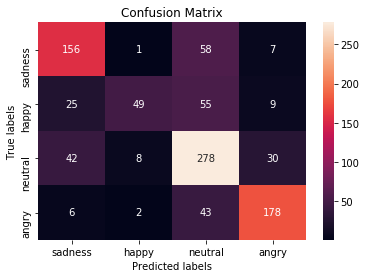

In [33]:
plot_confusion_matrix(y_test, y_pred, labels)

In [36]:
params = {'n_estimators': [400, 500, 600], 'learning_rate': [0.05, 0.1, 0.3, 0.5], 'max_depth': [10, 20, 30, 40]}

xgb = XGBClassifier(verbosity=1)
clf = GridSearchCV(xgb, param_grid=params, n_jobs=-1, verbose=1, cv=2)
clf.fit(X_train, y_train, sample_weights)
        
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  7.7min finished


Best score: 0.6602428722280888
Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 400}


In [37]:
xgb_best = clf.best_estimator_

In [38]:
y_pred = xgb_best.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      angry       0.79      0.80      0.79       229
      happy       0.82      0.36      0.50       138
    neutral       0.67      0.80      0.73       358
    sadness       0.70      0.71      0.71       222

avg / total       0.73      0.71      0.71       947



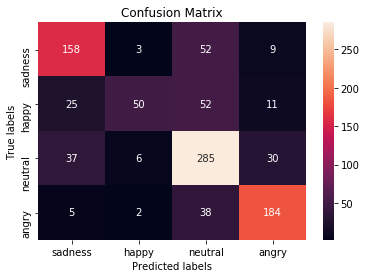

In [39]:
plot_confusion_matrix(y_test, y_pred, labels)

In [49]:
params = {'activation':['relu'], 'hidden_layer_sizes':[100, 300, 500], 'alpha':[1e-4, 5e-4, 1e-3, 1e-2], 
          'solver':['sgd', 'adam'], 'learning_rate':['adaptive'],'warm_start':[True, False], 
          'momentum':[0.8, 0.9]}

nnet = MLPClassifier(tol=0.0001, nesterovs_momentum=True, beta_1=0.9, beta_2=0.999)
clf = GridSearchCV(nnet, param_grid=params, verbose=1, cv=2, n_jobs=-1)
clf.fit(X_train, y_train)

print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 15.6min finished


Best score: 0.6240760295670539
Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 300, 'learning_rate': 'adaptive', 'momentum': 0.9, 'solver': 'adam', 'warm_start': True}


In [46]:
nnet_best = clf.best_estimator_

In [47]:
y_pred = nnet_best.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      angry       0.73      0.80      0.77       229
      happy       0.66      0.35      0.45       138
    neutral       0.64      0.66      0.65       358
    sadness       0.65      0.75      0.70       222

avg / total       0.67      0.67      0.66       947



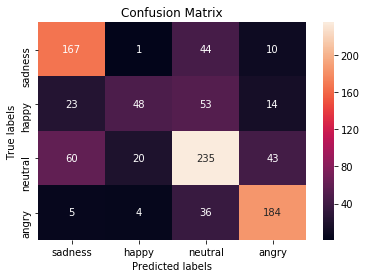

In [48]:
plot_confusion_matrix(y_test, y_pred, labels)

In [50]:
voted_class = VotingClassifier(estimators=[('lr', log_best),('rf', rf_best), ('gbm', gbm_best), 
                                           ('xgb', xgb_best), ('nnet', nnet_best)], voting='soft', n_jobs=-1)

voted_class.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1        5046.8088           20.17s
         2        4940.1047           23.43s
         3        4847.0033           20.91s
         4        4755.1175           19.23s
         5        4672.6094           18.78s
         6        4600.1922           17.99s
         7        4528.8210           17.82s
         8        4460.2696           18.30s
         9        4396.8096           17.77s
        10        4336.5789           18.09s
        20        3916.1625           18.49s
        30        3651.3594           15.86s
        40        3453.2104           14.31s
        50        3308.0001           13.25s
        60        3187.0982           12.48s
        70        3076.4946           11.82s
        80        2980.8225           11.24s
        90        2894.0215           10.71s
       100        2815.3602           10.23s
       200        2252.7380            5.52s
       300        1864.9482            2.43s
       40

VotingClassifier(estimators=[('lr', LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)), ('rf', Ra...e=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=True))],
         flatten_transform=None, n_jobs=-1, voting='soft', weights=None)

In [51]:
y_pred = voted_class.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, labels))

             precision    recall  f1-score   support

      angry       0.79      0.80      0.80       229
      happy       0.87      0.38      0.53       138
    neutral       0.67      0.78      0.72       358
    sadness       0.70      0.75      0.72       222

avg / total       0.74      0.72      0.71       947

[[167   0  48   7]
 [ 25  52  49  12]
 [ 43   6 280  29]
 [  4   2  40 183]]


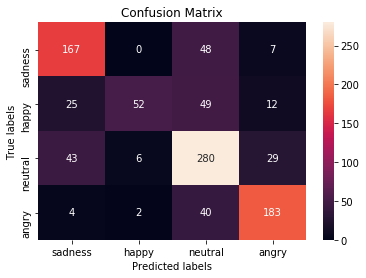

In [52]:
plot_confusion_matrix(y_test, y_pred, labels)

In [133]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbosity=1)

In [53]:
def Stacking(model, model_name, x_train, y_train, test, n_fold):
    folds = StratifiedKFold(n_splits=n_fold)
    test_pred=pd.DataFrame()
    train_pred = pd.DataFrame()
    
    labels = list(model.classes_)
    column_name = [str(label)+ '_' + str(model_name) for label in labels]
    print(column_name)
    
    for train_idx, val_idx in folds.split(x_train, y_train):
        X_train, X_val, Y_train, Y_val = x_train.iloc[train_idx], x_train.iloc[val_idx], y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model.fit(X_train, Y_train)
        pred = pd.DataFrame(model.predict_proba(X_val))
        pred.columns = column_name
        train_pred = pd.concat([train_pred, pred], axis=0)
        
    pred_test = pd.DataFrame(model.predict_proba(test))
    pred_test.columns = column_name
    return pred_test, train_pred

In [54]:
models = [log_best, rf_best, gbm_best, xgb_best, nnet_best]
model_names = ['lr','rf', 'gbm', 'xgb', 'nnet']
df_ensemble_train = pd.DataFrame()
df_ensemble_test = pd.DataFrame()

for model, model_name in zip(models, model_names):
    print(model)
    test_pred, train_pred = Stacking(model, model_name, X_train, y_train, X_test, 2)
    
    
    df_ensemble_train = pd.concat([df_ensemble_train, train_pred], axis=1)
    df_ensemble_test = pd.concat([df_ensemble_test, test_pred], axis=1)

LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
['angry_lr', 'happy_lr', 'neutral_lr', 'sadness_lr']
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=30, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
['angry_rf', 'happy_rf', 'neutral_rf', 'sadness_rf']
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=10, max_leaf_nodes=None,
              min_impu

In [55]:
df_ensemble_train.head()

,angry_lr,happy_lr,neutral_lr,sadness_lr,angry_rf,happy_rf,neutral_rf,sadness_rf,angry_gbm,happy_gbm,neutral_gbm,sadness_gbm,angry_xgb,happy_xgb,neutral_xgb,sadness_xgb,angry_nnet,happy_nnet,neutral_nnet,sadness_nnet
0,0.007586,0.050030,0.181484,0.760901,0.028571,0.095714,0.327143,0.548571,0.006669,0.043657,0.137506,0.812167,0.000185,0.005052,0.005614,0.989149,0.027391,0.048443,0.354854,0.569312
1,0.424950,0.301369,0.270956,0.002725,0.440000,0.145714,0.362857,0.051429,0.466173,0.177541,0.339677,0.016609,0.649433,0.034485,0.315185,0.000897,0.694515,0.074915,0.221575,0.008996
2,0.045731,0.548700,0.293352,0.112217,0.174286,0.164286,0.542857,0.118571,0.109759,0.191779,0.651713,0.046749,0.009057,0.015835,0.968799,0.006309,0.172247,0.242351,0.439157,0.146244
3,0.114177,0.261585,0.432063,0.192175,0.150000,0.137143,0.545714,0.167143,0.154067,0.185261,0.508561,0.152111,0.121165,0.097160,0.767549,0.014126,0.183136,0.117670,0.497551,0.201642
4,0.485213,0.033123,0.438293,0.043372,0.115714,0.142857,0.577143,0.164286,0.218510,0.054797,0.646959,0.079734,0.007834,0.002369,0.982249,0.007548,0.452823,0.081369,0.349449,0.116359


In [157]:
df_ensemble_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3788 entries, 0 to 1891
Data columns (total 12 columns):
angry_rf       3788 non-null float64
happy_rf       3788 non-null float64
neutral_rf     3788 non-null float64
sadness_rf     3788 non-null float64
angry_gbm      3788 non-null float64
happy_gbm      3788 non-null float64
neutral_gbm    3788 non-null float64
sadness_gbm    3788 non-null float64
angry_xgb      3788 non-null float32
happy_xgb      3788 non-null float32
neutral_xgb    3788 non-null float32
sadness_xgb    3788 non-null float32
dtypes: float32(4), float64(8)
memory usage: 325.5 KB


In [158]:
df_ensemble_test.head()

,angry_rf,happy_rf,neutral_rf,sadness_rf,angry_gbm,happy_gbm,neutral_gbm,sadness_gbm,angry_xgb,happy_xgb,neutral_xgb,sadness_xgb
0,0.090,0.218,0.456,0.236,0.011855,0.194151,0.606161,0.187833,0.045116,0.325267,0.333476,0.296141
1,0.098,0.064,0.516,0.322,0.034845,0.009988,0.871737,0.083431,0.015137,0.004746,0.741127,0.238990
2,0.054,0.028,0.450,0.468,0.010876,0.003145,0.272965,0.713014,0.007902,0.002882,0.122431,0.866785
3,0.342,0.380,0.272,0.006,0.016246,0.947258,0.035894,0.000602,0.174514,0.804695,0.019260,0.001530
4,0.004,0.094,0.100,0.802,0.000193,0.002127,0.003039,0.994642,0.000277,0.006403,0.002497,0.990823


In [169]:
y_train.label.value_counts()

neutral    1433
angry       917
sadness     885
happy       553
Name: label, dtype: int64

In [56]:
params = {'n_estimators': [200, 400, 500], 'learning_rate': [0.05, 0.1, 0.5], 'max_depth': [5, 10, 20]}

xgb = XGBClassifier(verbosity=1)
xgb_fit = GridSearchCV(xgb, param_grid=params, n_jobs=-1, verbose=1, cv=2)
xgb_fit.fit(df_ensemble_train, y_train, sample_weights)
        
print('Best score: {}'.format(xgb_fit.best_score_))
print('Best parameters: {}'.format(xgb_fit.best_params_))

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   28.4s finished


Best score: 0.6404435058078142
Best parameters: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200}


In [57]:
xgb_best = xgb_fit.best_estimator_
y_pred = xgb_best.predict(df_ensemble_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

      angry       0.77      0.74      0.75       229
      happy       0.64      0.41      0.50       138
    neutral       0.63      0.73      0.67       358
    sadness       0.67      0.67      0.67       222

avg / total       0.67      0.67      0.67       947

[[169   6  47   7]
 [  9  56  48  25]
 [ 34  20 261  43]
 [  8   5  60 149]]


In [58]:
params = {'n_estimators': [200, 300, 400, 500], 'learning_rate': [0.05, 0.1, 0.5], 'max_features':[2, 4, 6], 
          'max_depth': [5, 10, 20]}

gbm = GradientBoostingClassifier(verbose=1)
gbm_fit = GridSearchCV(gbm, param_grid=params, n_jobs=-1, verbose=1, cv=2)
gbm_fit.fit(df_ensemble_train, y_train, sample_weights)
print('Best score: {}'.format(gbm_fit.best_score_))
print('Best parameters: {}'.format(gbm_fit.best_params_))

Fitting 2 folds for each of 108 candidates, totalling 216 fits
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
         1        2470.2357            5.86s
      Iter       Train Loss   Remaining Time 
         1        2473.0587            5.70s
         1        2473.0587            5.72s
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
         1        2470.2357            7.63s
         2        2371.0834            5.65s
         1        2470.2357            8.83s
         2        2371.5493            5.47s
         2        2371.5493            5.48s
         1        2473.0587            9.79s
         3        2281.5393            5.19s
         2        2371.0834            7.12s
         3        2280.2830            5.24s
         1        2470.2357           14.10s
         2        2371.0834   

        10        1849.2317            5.80s
         7        1959.2202           13.69s
         8        1901.3735            7.48s
         4        2162.9400            9.39s
         9        1846.9924            4.77s
         2        2346.6095           27.74s
         4        2172.5043           14.19s
         7        1970.2170           14.09s
         5        2095.5341            6.10s
         9        1856.7599            9.71s
         9        1856.7599            7.82s
         4        2172.5043           13.90s
         4        2162.9400           13.47s
         5        2095.5341            9.48s
         6        2012.1196            6.14s
         8        1901.3735           13.42s
         9        1846.9924            7.54s
         5        2084.3580            9.06s
        10        1806.6615            9.34s
        10        1797.4147            4.77s
         8        1901.3735           12.15s
         8        1910.3471           13.86s
         3

        60         901.5291            3.09s
        70         940.2244            2.63s
        60         940.7511            7.43s
        50        1023.1408            3.95s
        70         940.2244            6.57s
        60         901.5291            5.33s
        80         846.4013            5.64s
        50         960.6850            3.93s
        80         846.4013            3.95s
        80         846.4013            2.21s
        60         940.7511            5.57s
        50         960.6850            6.54s
        60         940.7511           10.07s
        80         846.4013            7.65s
        80         872.0640            4.07s
        70         940.2244            8.72s
        50        1003.1764           11.89s
        50        1003.1764            4.16s
        50         960.6850            9.49s
        50         960.6850           12.12s
        50        1003.1764            9.55s
        60         901.5291            8.29s
        50

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.9s


         2        2239.9664           19.77s
         3        2093.6184           19.33s
         3        2085.1941           20.17s
         4        1952.4948           19.56s
         4        1955.9049           20.03s
         5        1837.7884           19.26s
       200         337.2360            4.16s
         5        1840.8843           20.67s
         6        1722.0086           19.59s
       200         301.2847            2.16s
         6        1733.2673           20.38s
       200         337.2360            2.18s
       200         301.2847            0.00s
         7        1620.8258           20.25s
       200         337.2360            6.57s
         7        1628.1882           20.16s
       200         301.2847            4.48s
      Iter       Train Loss   Remaining Time 
         8        1532.1674           20.04s
         8        1529.9801           20.24s
         1        2399.2315           22.44s
       200         301.2847            6.90s
         

         9        1391.3239           32.34s
         4        1919.0962           42.33s
       400          93.3394            0.00s
         8        1486.9271           34.50s
         4        1929.0218           41.71s
         5        1796.2116           42.23s
        10        1313.4715           33.09s
         5        1809.8756           44.19s
         9        1400.7457           34.38s
        40         334.4524           25.59s
      Iter       Train Loss   Remaining Time 
         6        1672.2657           45.37s
       400          93.3394            2.12s
         6        1696.0270           44.53s
        10        1318.0432           35.14s
         1        2381.8981           40.07s
        30         498.5919           39.34s
        30         514.7806           40.48s
        30         507.9564           50.15s
         7        1569.2041           47.07s
         2        2212.8295           46.21s
         7        1592.2924           45.75s
        3

        70         109.3342           43.99s
       500          38.3808            0.00s
        70          94.5515           44.59s
        90          54.6623           11.09s
        20         720.6634           34.19s
        80          76.7563           22.15s
        30         406.2039           21.16s
        50         178.8458           28.40s
        50         190.2128           27.80s
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
        20         704.6808           35.64s
        30         451.8300           21.35s
         1        2389.4777           38.08s
         1        2364.3206           45.73s
        40         278.5360           52.70s
        90          46.7521           20.20s
         2        2188.2683            1.02m
         2        2211.9279           52.31s
         3        2023.4768            1.00m
         3        2055.9924            1.00m
        60         106.9407           15.77s
        

      Iter       Train Loss   Remaining Time 
         9        1115.1353           42.67s
       100          30.2883           34.10s
         1        2315.8857           38.64s
         6        1444.2693           51.03s
         2        2089.3351           43.91s
        10        1026.4522           43.88s
         3        1896.1321           49.34s
         7        1323.8118           50.88s
         4        1725.0950           53.76s
        90          41.2147           47.56s
         8        1213.9945           50.84s
       300           0.6363           12.00s
        90          31.0093           48.21s
         5        1573.9478           56.62s
       300           0.6346            6.11s
         9        1115.6061           50.80s
         6        1437.9448            1.02m
        10        1025.9985           50.64s
       400           0.6363            4.64s
       300           1.9729            0.00s
         7        1316.1629            1.04m
       30

        20         463.6713            1.54m
         3        1899.6595            1.61m
         1        2313.2782           29.26s
        20         459.6728            1.56m
        10        1023.7947            1.12m
         4        1724.9565            1.54m
         9        1109.4141            1.41m
         7        1321.7640            1.37m
       200           0.9208            9.62s
         2        2086.8005           33.24s
       200           2.8194            9.65s
         4        1727.7052            1.69m
        20         463.6713            1.93m
         5        1574.2644            1.65m
        10        1020.1719            1.43m
        20         462.9099            1.98m
         8        1212.7018            1.40m
         3        1893.3602           36.50s
       200           0.9781           18.98s
         5        1575.5652            1.73m
        30         213.7719            1.11m
         6        1439.3445            1.74m
       400

      Iter       Train Loss   Remaining Time 
       100           1.3380           16.81s
        60          22.3304           28.04s
        80           5.1409           41.16s
         1        2318.6539            1.03m
        40         101.6257            1.42m
         2        2096.1985            1.29m
        60          24.5102           53.88s
        60          22.8609            1.26m
        50          48.8016           34.53s
         3        1900.4248            1.49m
        60          23.0022            1.60m
        60          24.5102            1.27m
        90           3.9295           20.72s
         4        1727.8787            1.64m
        60          22.3206           46.70s
       200           0.8751            0.00s
        40         100.0098            1.85m
        60          24.5102            1.65m
         5        1576.8964            1.72m
        90           2.4978           37.15s
        40         102.0099            1.85m
        5

        20        1185.4543            5.89s
       200           0.8599           18.27s
        70          12.1711            1.43m
        20        1180.8056            9.31s
        30         996.1154            5.35s
        90         397.1830            4.31s
        90           3.8626           36.85s
       200           2.1611            9.36s
       200           0.7925            8.23s
       100           2.7285           16.69s
        30         980.1916            8.31s
       100         344.3185            4.07s
        50          48.6935           54.99s
        40         858.5954            5.10s
        70          10.5668           25.76s
       200           2.1611           18.73s
        40         823.1527            7.74s
       300           0.8643           12.30s
        50         749.8949            4.87s
       300           0.8546            6.29s
        80           5.0465            1.28m
        50         708.6672            7.28s
        90

       300           0.7811            6.08s
       300           2.0665            0.00s
        30         920.3799            7.16s
        50         647.6604            3.79s
        50         667.6333            3.87s
        80         492.7621            8.76s
       500           2.0841            0.00s
       100           1.3322           16.63s
        50         655.0386            6.22s
        90         397.1830            8.92s
       200         109.8102            1.84s
      Iter       Train Loss   Remaining Time 
        40         776.3576            6.57s
        90         430.2219            8.41s
         1        2346.1903            8.69s
        80           4.9833           40.53s
        60         552.9077            3.46s
        80           6.4611           22.43s
         2        2162.7377           11.84s
        60         577.4842            3.52s
         3        2016.4253           10.98s
       200           0.7831           26.15s
         

        90         378.5508            7.44s
        30         913.6365            5.09s
       100         309.7680            7.01s
        90           2.4430           55.44s
        40         723.9252            4.70s
       400           2.0558            4.89s
         7        1604.0849           14.17s
         8        1535.6826           13.77s
         9        1477.8128           13.09s
        20        1065.7022            8.33s
        10        1422.5548           12.59s
        70         503.0151           10.59s
       100         328.6151            7.16s
        80         404.4332           10.46s
        40         768.7147            4.60s
        50         617.5548            4.29s
        30         867.6629            7.70s
        50          48.5407            1.71m
        80         440.1680           10.18s
        90         345.1643           10.20s
        20        1090.0371            9.96s
       200           0.7682            8.77s
        60

         7        1081.6403           29.87s
       400           8.2357            1.85s
        80         430.0313            9.06s
        80         388.5186            9.12s
         5        1370.7318           27.78s
       300          20.9419            0.00s
         8         978.6533           30.45s
       400          12.2907            1.82s
      Iter       Train Loss   Remaining Time 
         6        1225.3725           28.39s
         9         880.6824           30.46s
        70         481.5567           12.30s
       300          27.9348            0.00s
      Iter       Train Loss   Remaining Time 
        80         388.5866           11.55s
         1        2200.2960           32.21s
        90         372.5868            8.68s
        90         333.5119            8.79s
         7        1095.5126           29.54s
         1        2227.6426           28.69s
        10         799.0010           31.27s
         2        1921.4449           38.14s
        

        10         732.1609           45.31s
         4        1451.8670           53.13s
       400           6.2000            2.20s
         5        1295.3785           41.85s
        40          68.1331           35.23s
         5        1275.7529           53.59s
        60          17.8178           13.68s
        60          22.1226           13.21s
         6        1154.4426           44.20s
        50          42.9107           22.81s
       300          20.3978            0.00s
        50          32.4629           24.66s
       400           9.7482            2.20s
         6        1132.9698           57.09s
       200           2.0829           27.39s
       300          26.7602            0.00s
         7        1029.8738           46.29s
      Iter       Train Loss   Remaining Time 
         7        1008.9215           57.27s
        40          77.5070           37.27s
        40          66.0841           46.22s
        30         149.0223           50.53s
         

         5        1264.0906           50.28s
        40          63.8429           49.72s
         1        2179.0880           52.21s
         4        1418.8858           46.92s
         3        1634.7059            1.03m
        50          33.5022           36.57s
        80           6.8413           39.58s
        20         276.3710           21.89s
        50          24.0569           47.05s
         2        1874.2774           57.54s
         6        1115.8922           50.36s
         5        1243.1293           47.16s
         4        1431.5729            1.02m
       200           0.6237            4.78s
       100           3.1416           26.08s
       100           1.1157           34.16s
         7         993.3365           50.44s
         5        1259.1874            1.01m
         6        1100.4185           47.33s
        70          10.2280           12.75s
         3        1627.0351            1.05m
        60          12.7511           35.51s
         6

         8         615.4563            1.15m
       200           1.8933            5.15s
        80           3.0585           12.41s
         5         995.5367            1.56m
       300           0.6240            0.00s
         2        1710.4527            1.58m
         8         623.0917            1.20m
        40          43.3822           42.92s
         1        2067.7851           27.62s
        40          57.6012           41.62s
        60          18.7098           15.26s
      Iter       Train Loss   Remaining Time 
         7         723.7941            1.46m
         9         522.5709            1.33m
         9         525.1879            1.16m
         6         842.2140            1.66m
         2        1696.7077           32.55s
         3        1422.6404            1.70m
         9         533.1515            1.21m
         1        2080.7967           29.84s
        40          46.0225           54.69s
       400           1.7462            2.98s
        1

         6         849.1919            1.74m
        20          99.3043           40.85s
       100           0.8980           28.31s
        20         100.8395            2.06m
         7         721.5405            1.77m
        90           4.1551           41.14s
        30          22.2226            1.02m
       500           1.6888            0.00s
       200           1.9065            0.00s
       300           0.6331            0.00s
       100           3.0213           28.84s
       100           1.0159           38.11s
         8         614.5895            1.80m
        30          23.9519            1.07m
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
        30          22.1206            1.63m
      Iter       Train Loss   Remaining Time 
        50           1.3164           25.29s
         1        2067.1340           27.67s
         1        2072.0429           28.27s
        30          23.7605            1.39m
       

         4        1186.1809            1.72m
        70           2.1674           15.83s
        40           4.9246           48.90s
        10         447.8691            1.07m
         3        1420.7778            1.86m
        40           4.9128            1.09m
        50           2.7188            1.37m
      Iter       Train Loss   Remaining Time 
        80           2.1181           12.96s
      Iter       Train Loss   Remaining Time 
         1        1786.0021            3.55s
       200           2.0973           10.17s
         9         522.9564            1.42m
         2        1519.9780            3.69s
         8         616.6961            1.53m
         1        1767.5486            6.31s
       300           0.8247            6.57s
         2        1491.9175            7.01s
         3        1347.2299            4.67s
         3        1310.0505            5.97s
        90           2.1022           10.67s
         4        1226.0597            5.20s
        

         1        1777.8816           10.29s
        80           0.8015           42.88s
        50          46.9559            7.44s
        20         348.0344           11.59s
         2        1496.4733           15.69s
        10         448.7030            2.10m
         3        1321.9912           14.48s
       200           0.7937            4.73s
         4        1196.3410           14.02s
        90           0.8015           37.49s
       200           0.7690            9.18s
         5        1100.2559           13.05s
        70           2.1612           39.29s
        70          16.6933            4.42s
       100           3.0968            1.90s
         6        1009.3743           13.85s
      Iter       Train Loss   Remaining Time 
       100           0.8015           33.17s
        70          19.5116            4.47s
        30         203.0200            9.30s
       100           4.8996            1.91s
         1        1733.1683            4.03s
         

       300           2.0000            3.40s
         6         916.2901           15.51s
       100           4.9489            8.17s
         7         817.4296           15.39s
        80           5.6780            2.84s
         8         755.4424           14.81s
        40          72.4822            5.74s
        50          46.6103            3.81s
         9         686.3475           14.69s
        30         158.9245            7.01s
        30         158.9245            9.12s
        30         147.1314            9.35s
        10         619.4228           15.97s
       300           0.5311            0.00s
        50          39.6129            5.47s
        90           2.9939            2.58s
        60          27.6793            3.45s
        40          85.6539            6.47s
       200           0.5483            4.16s
        40          75.4294            8.91s
      Iter       Train Loss   Remaining Time 
        40          85.6539            8.65s
       50

        50           2.7022           40.12s
       200           0.7675            4.63s
         4        1104.0612           15.60s
       400           1.6237            0.00s
         5         977.2115           15.51s
        30         154.8194            7.73s
        50          46.9201            4.15s
       200           2.0548            0.00s
       500           0.5483            0.00s
         6         895.2141           15.99s
        60          19.1477            3.62s
       400           2.0014            2.82s
        40          65.9333            7.54s
         7         807.8342           15.16s
        30          23.0733            1.72m
        20         271.3149           12.71s
       200           0.5570            1.47s
       100           1.9746            9.33s
         8         747.3577           14.47s
      Iter       Train Loss   Remaining Time 
        80           9.7652            9.39s
         1        1699.2857           13.05s
         

        90           3.3936            8.15s
       200           0.7663            9.51s
         1        1251.7118           39.19s
         4         313.7678           39.90s
       100           4.0377            5.25s
         9          49.4971           34.44s
        80           2.1050           37.73s
        60          26.8485           11.99s
        10          42.0082           31.17s
        70           0.7944           52.70s
         2         749.8056           39.33s
         1        1234.9748           53.95s
        20           1.4654           15.22s
         5         211.6754           39.93s
        10          35.5857           34.62s
        90           2.0863           32.84s
        80           0.7753           45.44s


[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  1.3min


        80           9.2418            8.64s
         6         152.7093           39.03s
       200           0.5532            0.00s
         2         739.0310           56.15s
         3         473.2576           45.13s
        90           0.7752           39.72s
        70          10.5593           11.57s
       100           2.0765           28.88s
       100           1.9595            7.82s
        50           2.6863            1.29m
      Iter       Train Loss   Remaining Time 
         7         112.0355           38.34s
       100           0.7752           35.23s
        70          15.7880           11.68s
         4         302.7684           45.83s
         3         469.3752           54.51s
        30           0.5642           10.73s
        20           3.7022           15.58s
        40           0.5642            7.80s
         8          83.8699           37.84s
         5         207.6260           44.45s
         1        1154.1990           18.01s
         

        10          40.9586           29.79s
         8          55.3462           38.30s
        60           1.8000           13.01s
        10          28.9701           31.64s
        50           0.5678           17.71s
       200           1.8494            3.92s
         4         259.0490           51.90s
        30           1.9606           31.07s
         5         168.5219           44.37s
         5         165.3773           55.27s
        70           1.7723           11.22s
         9          38.3314           38.18s
        60           0.5678           15.03s
       200           0.5678            2.80s
         5         161.2525           54.47s
        40           1.8841           23.92s
         6         112.3775           45.04s
         6         113.7852           53.70s
        70           0.5678           13.19s
        80           1.7429            9.86s
       400           0.7752            2.65s
        10          26.8970           37.79s
        20

        40           0.6020           23.82s
         2         664.6020           52.78s
         6         108.8389           56.79s
       100           0.5989            7.17s
         6         117.2299           48.92s
         1         834.0666           32.81s
        50           0.6020           19.07s
         9          38.8741           42.93s
        40           1.8728           19.34s
        30           1.9641           32.44s
       500           0.5532            0.00s
        90           1.7099            6.38s
         9          42.7171           34.15s
        10          28.6338           32.53s
        60           0.6020           15.94s
         1         812.0733           33.68s
         7          79.3545           47.98s
         3         381.4165            1.00m
         7          74.2435           56.24s
        50           1.8277           15.92s
        70           0.6020           13.71s
      Iter       Train Loss   Remaining Time 
       10

         3         166.3784            1.81m
         5          35.8985            1.34m
         7           9.6739            1.03m
        30           0.8531           11.18s
         1         805.0304           32.53s
       300           1.5290            0.00s
         3         165.7247           40.77s
        80           0.5922           13.40s
        50           1.8419           18.26s
         8           3.9691            1.05m
         4          76.5869            1.60m
        40           0.8531            8.13s
        40           2.0639            7.99s
       100           1.6547            3.06s
         1         809.9536           45.61s
        80           1.7321            8.05s
        90           0.5922           11.96s
      Iter       Train Loss   Remaining Time 
        50           0.8531            6.31s
         8           5.3653           59.02s
        50           2.0425            6.20s
         5          38.2283            1.36m
         

         1         828.0951           43.69s
       100           0.7660            7.30s
       400           1.5302            1.32s
         6          17.1536            1.28m
       100           0.7936            8.68s
       200           0.8531            1.55s
         8           5.2823           38.56s
        80           1.9844            9.32s
        40           2.0639           24.49s
        40           0.7336            8.21s
         3         165.7247            1.71m
       200           1.6008            4.04s
         7           8.2628            1.10m
         1         797.5979           50.14s
         7           9.6159           59.67s
         1         810.9326           48.53s
        50           2.0425           19.88s
        50           0.7336            6.36s
         4          80.4371            1.61m
         9           3.2916           36.30s
        90           1.9749            8.35s
         7           8.2039            1.24m
         3

        40           0.7347            7.66s
         9           1.9151           51.22s
         6          17.0940            1.39m
        70           2.0548           11.30s
        60           0.7336           15.58s
         4          75.8476            1.50m
         4          79.0549            1.51m
        10           1.0871           47.32s
        10           2.4500           34.47s
        50           0.7347            5.92s
         9           3.2998           53.89s
        60           2.0140           14.75s
        70           0.7336           13.34s
        80           2.0494            9.89s
        80           0.7336           11.60s
        60           0.7347            4.74s
       200           0.7276            2.81s
        10           2.4579           50.63s
        20           2.0799           17.12s
       400           0.7936            0.96s
       400           1.5457            0.00s
       400           0.7660            0.00s
        20

[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.5min finished


      Iter       Train Loss   Remaining Time 
         1        4648.6223           58.52s
         2        4210.1091            1.15m
         3        3829.2868            1.25m
         4        3493.7738            1.25m
         5        3201.3667            1.25m
         6        2939.0380            1.26m
         7        2697.5283            1.28m
         8        2476.0200            1.30m
         9        2276.8832            1.31m
        10        2098.7658            1.31m
        20         959.9058            1.32m
        30         456.9809            1.27m
        40         219.9590            1.20m
        50         107.1787            1.12m
        60          52.5761            1.02m
        70          26.1636           55.27s
        80          13.4407           49.54s
        90           7.3026           44.43s
       100           4.4708           39.81s
       200           2.8971           10.63s
       300           2.8385            0.00s
Best scor

In [59]:
gbm_best = gbm_fit.best_estimator_
y_pred = gbm_best.predict(df_ensemble_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

      angry       0.78      0.75      0.77       229
      happy       0.72      0.39      0.51       138
    neutral       0.64      0.77      0.70       358
    sadness       0.69      0.69      0.69       222

avg / total       0.70      0.69      0.69       947

[[171   4  48   6]
 [ 11  54  47  26]
 [ 28  15 277  38]
 [  8   2  59 153]]


In [60]:
params = {'n_estimators': [200, 300, 500, 700], 'criterion': ['entropy', 'gini'], 'max_depth': [5, 10, 20, 30],
          'max_features': [4, 6, 8, 10]}

rf = RandomForestClassifier(class_weight="balanced")
rf_fit = GridSearchCV(rf, param_grid=params, n_jobs=-1, verbose=1, cv=2)
rf_fit.fit(df_ensemble_train, y_train)
print('Best score: {}'.format(rf_fit.best_score_))
print('Best parameters: {}'.format(rf_fit.best_params_))

Fitting 2 folds for each of 128 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:  1.8min finished


Best score: 0.6562829989440337
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 4, 'n_estimators': 500}


In [61]:
rf_best = rf_fit.best_estimator_
y_pred = rf_best.predict(df_ensemble_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

      angry       0.77      0.78      0.78       229
      happy       0.64      0.41      0.50       138
    neutral       0.67      0.70      0.69       358
    sadness       0.67      0.77      0.72       222

avg / total       0.69      0.69      0.69       947

[[178   4  39   8]
 [ 12  56  43  27]
 [ 33  23 252  50]
 [  7   4  40 171]]


Best result from voted classifier

In [62]:
y_pred = voted_class.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      angry       0.79      0.80      0.80       229
      happy       0.87      0.38      0.53       138
    neutral       0.67      0.78      0.72       358
    sadness       0.70      0.75      0.72       222

avg / total       0.74      0.72      0.71       947



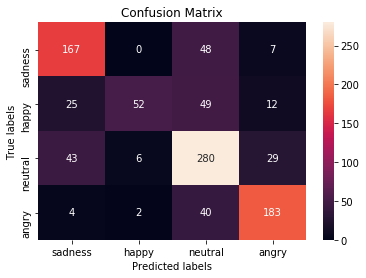

In [63]:
plot_confusion_matrix(y_test, y_pred, labels)